<a href="https://colab.research.google.com/github/Hrithik-Bhattacharya/AI_CV/blob/main/Honey_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("/content/adulteration_dataset_26_08_2021.csv")

In [ ]:
df.head()
df.describe()

,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,...,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000
mean,3.492795,21.210375,21.409408,1.010990,1.000701,0.985824,0.967903,0.924619,0.839474,0.705838,...,0.395885,0.395783,0.399881,0.407497,0.419155,0.434333,0.452617,0.471370,0.491992,0.518427
std,1.705093,20.829969,20.817630,0.035927,0.035852,0.034740,0.032214,0.034189,0.042209,0.053436,...,0.037140,0.037647,0.038207,0.038667,0.039125,0.039465,0.039790,0.040014,0.040090,0.040282
min,1.000000,0.000000,0.000000,0.920153,0.897098,0.883949,0.879236,0.834011,0.735861,0.570913,...,0.336157,0.335316,0.336635,0.340854,0.350229,0.359668,0.377267,0.386495,0.405731,0.431541
25%,2.000000,5.000000,5.100000,0.984468,0.973940,0.959895,0.944302,0.901376,0.808138,0.665415,...,0.365473,0.365229,0.369302,0.376571,0.387980,0.403313,0.422358,0.442105,0.463944,0.491342
50%,3.000000,10.000000,10.200000,1.005687,0.995931,0.981429,0.964417,0.921528,0.835100,0.699941,...,0.389018,0.387813,0.391050,0.397971,0.409096,0.424212,0.442930,0.462629,0.484104,0.511836
75%,5.000000,25.000000,25.280000,1.035234,1.024786,1.008960,0.987066,0.944934,0.865902,0.739983,...,0.422947,0.422749,0.426646,0.434484,0.445368,0.459482,0.476847,0.494515,0.513860,0.538322
max,6.000000,100.000000,100.000000,1.160034,1.145434,1.126460,1.091392,1.071707,1.029565,0.952382,...,0.505566,0.508406,0.514678,0.523624,0.536547,0.555101,0.576369,0.594769,0.615018,0.640209


In [ ]:
print('Missing=',df.isnull().sum)
print('Duplicate=',df.duplicated().sum())

Missing= <bound method DataFrame.sum of       Brand  Acquisition  Concentration_Class  Concentration  399.40nm  \
0     False        False                False          False     False   
1     False        False                False          False     False   
2     False        False                False          False     False   
3     False        False                False          False     False   
4     False        False                False          False     False   
...     ...          ...                  ...            ...       ...   
8670  False        False                False          False     False   
8671  False        False                False          False     False   
8672  False        False                False          False     False   
8673  False        False                False          False     False   
8674  False        False                False          False     False   

      404.39nm  409.38nm  414.37nm  419.37nm  424.38nm  ...  1020.10nm 

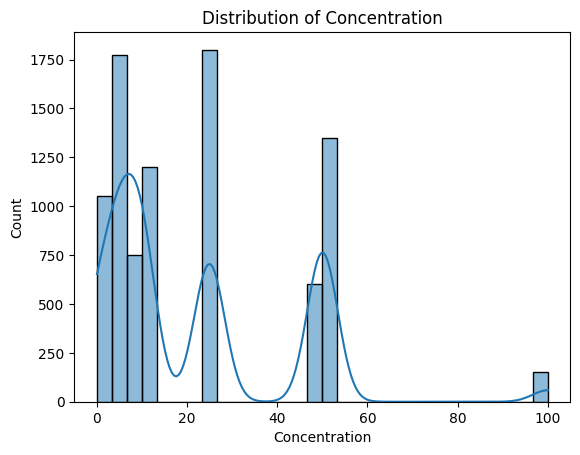

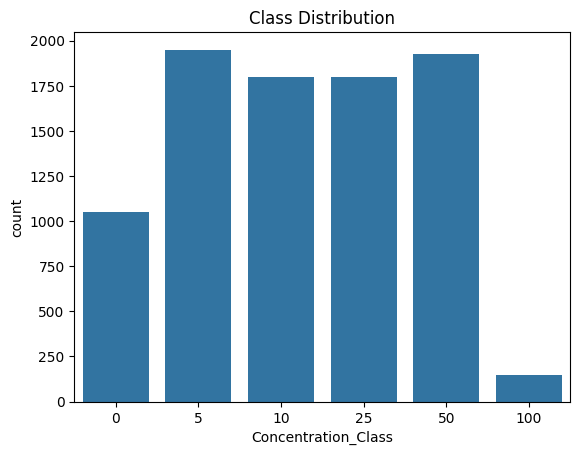

In [ ]:
sns.histplot(df['Concentration'],bins=30, kde=True)
plt.title("Distribution of Concentration")
plt.show()

sns.countplot(x="Concentration_Class",data=df)
plt.title("Class Distribution")
plt.show()

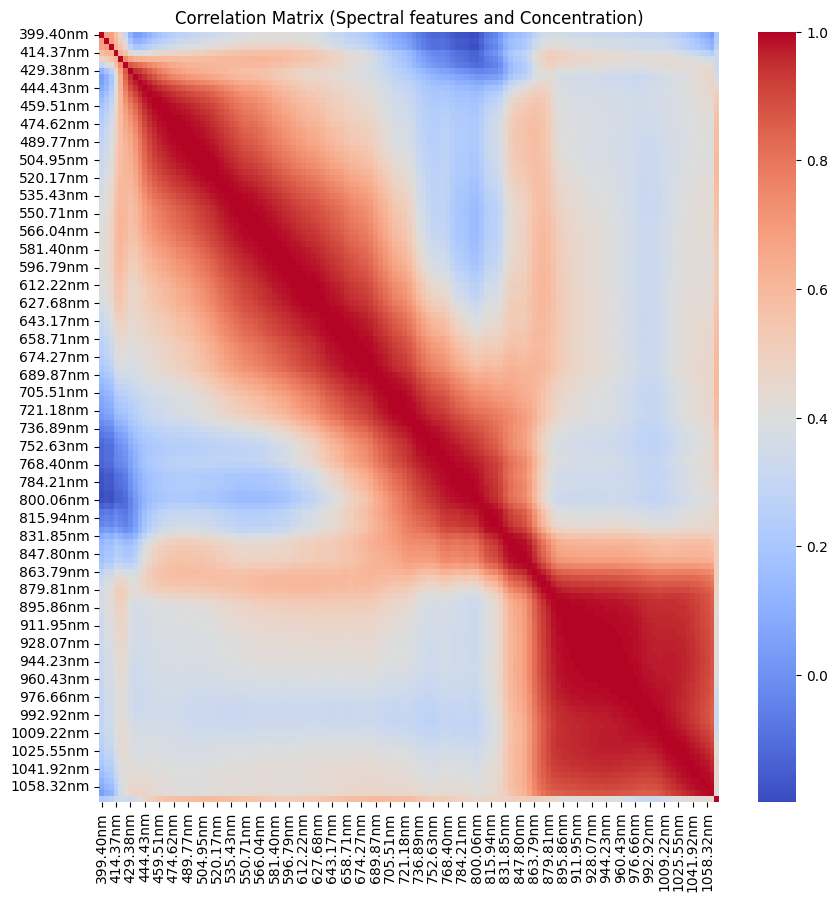

In [ ]:
#Correlation Matrix for spectral imaging data
spectral_cols=[col for col in df.columns if 'nm' in col]
corr_matrix=df[spectral_cols+['Concentration']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (Spectral features and Concentration)")
plt.show()

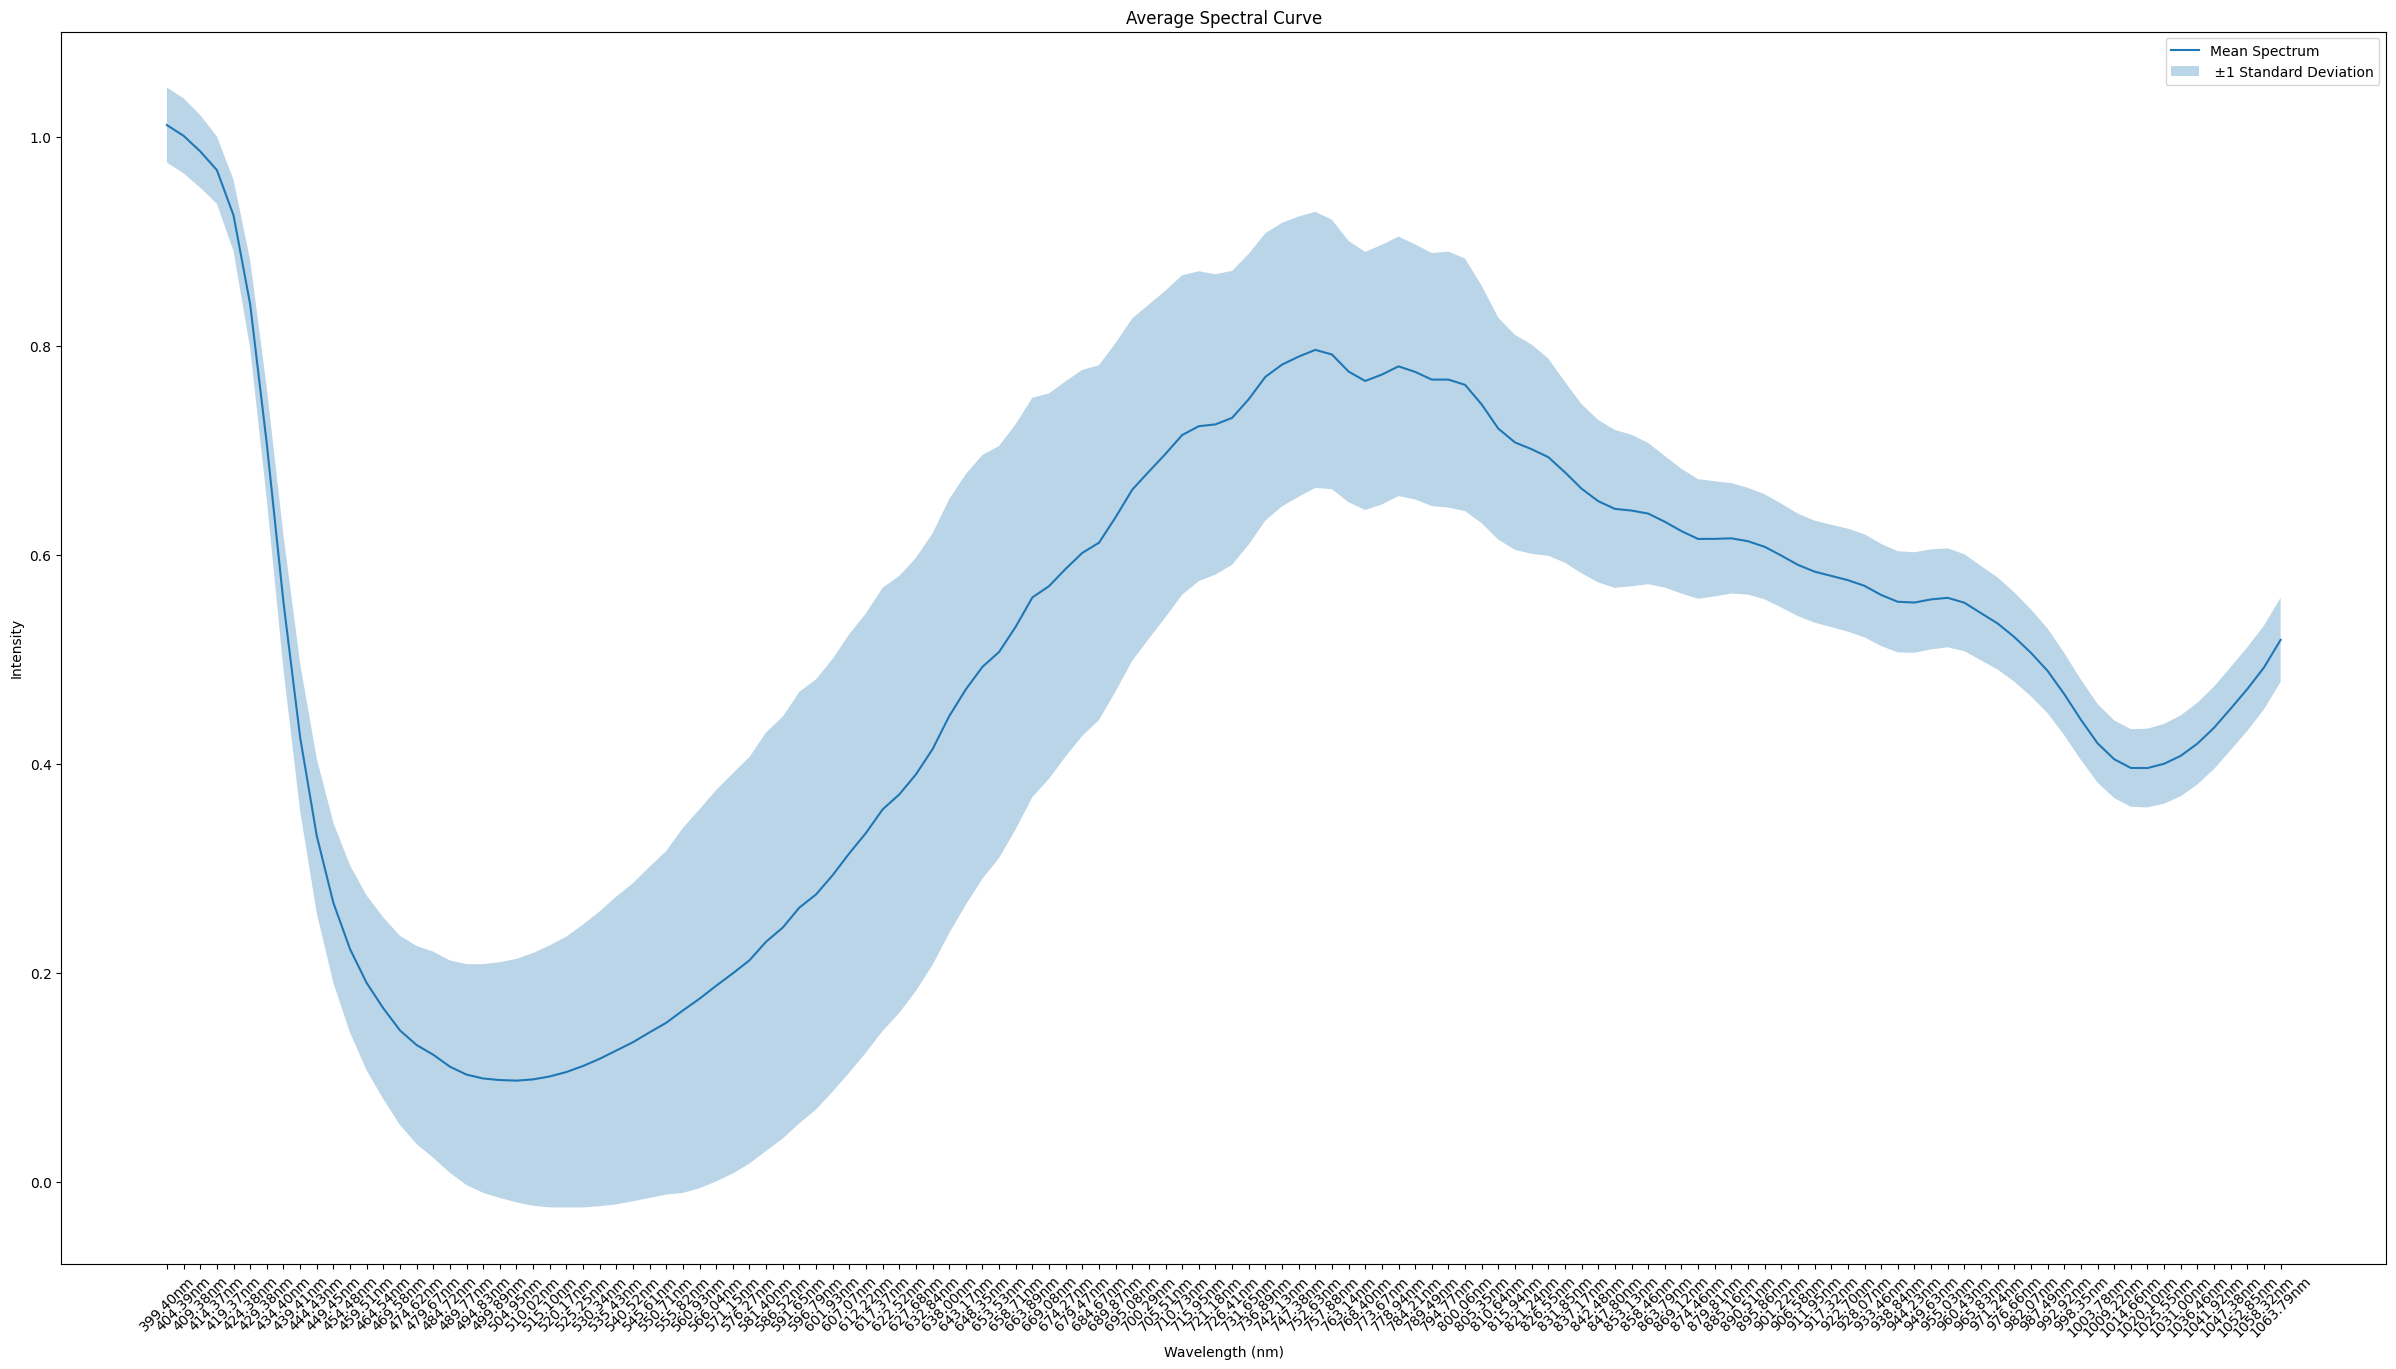

In [ ]:
mean_curve=df[spectral_cols].mean()
std_curve=df[spectral_cols].std()

plt.figure(figsize=(30,16))
plt.plot(spectral_cols,mean_curve,label='Mean Spectrum')
plt.fill_between(spectral_cols,mean_curve-std_curve,mean_curve+std_curve, alpha=0.3,label=' ±1 Standard Deviation')
#contains around 95% of the values
plt.xticks(rotation=45)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title("Average Spectral Curve")
plt.legend()
plt.show()

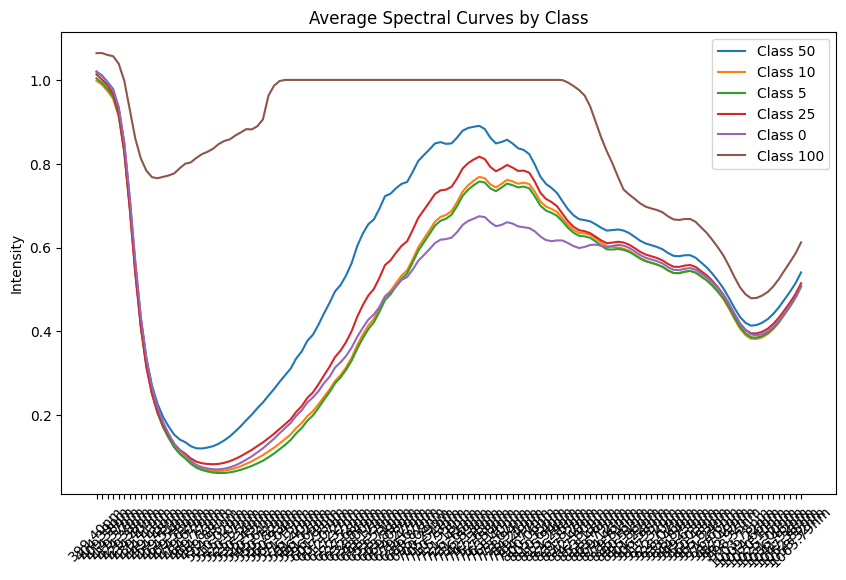

In [ ]:
# Group by class and plot average spectra
plt.figure(figsize=(10,6))
for cls in df['Concentration_Class'].unique():
    avg_curve = df[df['Concentration_Class'] == cls][spectral_cols].mean()
    plt.plot(spectral_cols, avg_curve, label=f"Class {cls}")
plt.xticks(rotation=45)
plt.ylabel("Intensity")
plt.title("Average Spectral Curves by Class")
plt.legend()
plt.show()


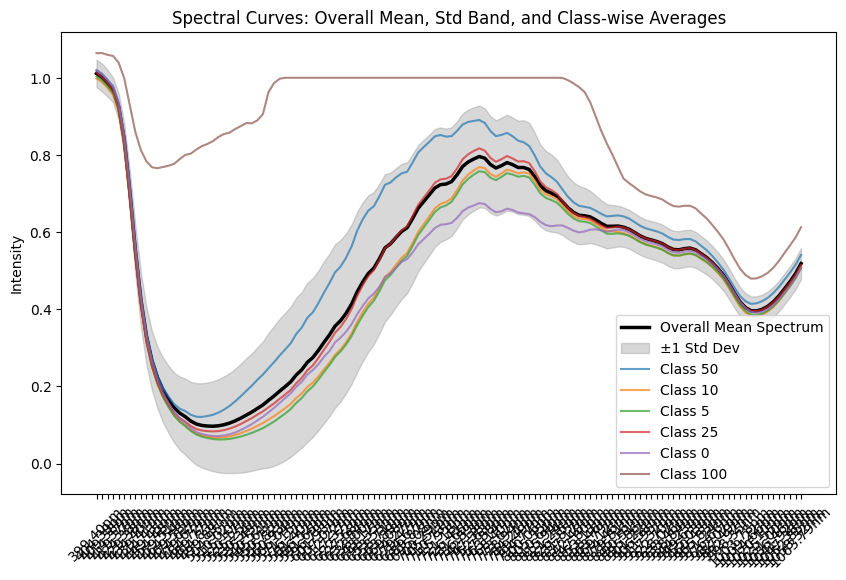

In [ ]:
# Identify spectral columns
spectral_cols = [col for col in df.columns if 'nm' in col]

# Overall mean and std
mean_curve = df[spectral_cols].mean()
std_curve = df[spectral_cols].std()

plt.figure(figsize=(10,6))

# Plot overall mean curve in bold black
plt.plot(spectral_cols, mean_curve, color='black', linewidth=2.5, label='Overall Mean Spectrum')

# Add shaded ±1 std band
plt.fill_between(spectral_cols,
                 mean_curve - std_curve,
                 mean_curve + std_curve,
                 color='gray', alpha=0.3, label='±1 Std Dev')

# Plot grouped curves by class
for cls in df['Concentration_Class'].unique():
    avg_curve = df[df['Concentration_Class'] == cls][spectral_cols].mean()
    plt.plot(spectral_cols, avg_curve, alpha=0.7, label=f"Class {cls}")

# Formatting
plt.xticks(rotation=45)
plt.ylabel("Intensity")
plt.title("Spectral Curves: Overall Mean, Std Band, and Class-wise Averages")
plt.legend()
plt.show()


Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.1701 - val_loss: 0.7707
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7407 - val_loss: 0.6402
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6310 - val_loss: 0.6008
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6004 - val_loss: 0.5910
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6083 - val_loss: 0.5857
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5992 - val_loss: 0.5822
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5748 - val_loss: 0.5799
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5965 - val_loss: 0.5782
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5700 - val_loss: 0.5770
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5790 - val_loss: 0.5760
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5739 - val_loss: 0.5751
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

AssertionError: Feature and SHAP matrices must have the same number of rows!

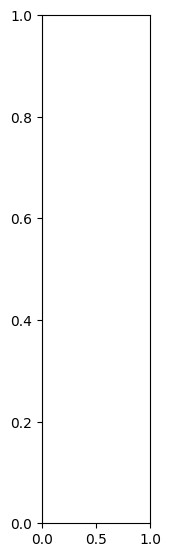

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import shap

X = df[spectral_cols].values
y = df['Concentration_Class'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# --- Autoencoder ---
input_dim = X_train.shape[1]
encoding_dim = 10  # latent dimension

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, validation_data=(X_test, X_test))

# --- Encoder model ---
encoder_model = models.Model(input_layer, encoded)
X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)

# --- Classifier ---
clf_input = layers.Input(shape=(encoding_dim,))
clf_hidden = layers.Dense(32, activation='relu')(clf_input)
clf_output = layers.Dense(len(np.unique(y_encoded)), activation='softmax')(clf_hidden)

classifier = models.Model(clf_input, clf_output)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_encoded, y_train, epochs=30, batch_size=64, validation_data=(X_test_encoded, y_test))

# --- SHAP analysis ---



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

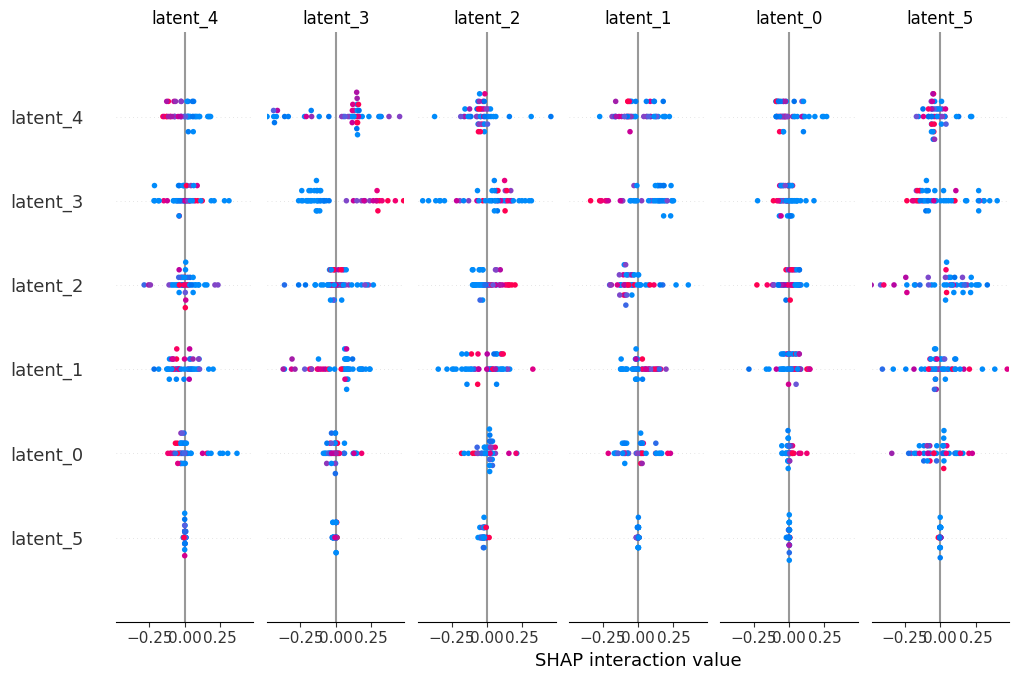

In [ ]:
explainer = shap.KernelExplainer(classifier.predict, X_train_encoded[:100])
shap_values = explainer.shap_values(X_test_encoded[:50])

# Visualize SHAP
shap.summary_plot(shap_values, X_test_encoded[:50], feature_names=[f"latent_{i}" for i in range(encoding_dim)])

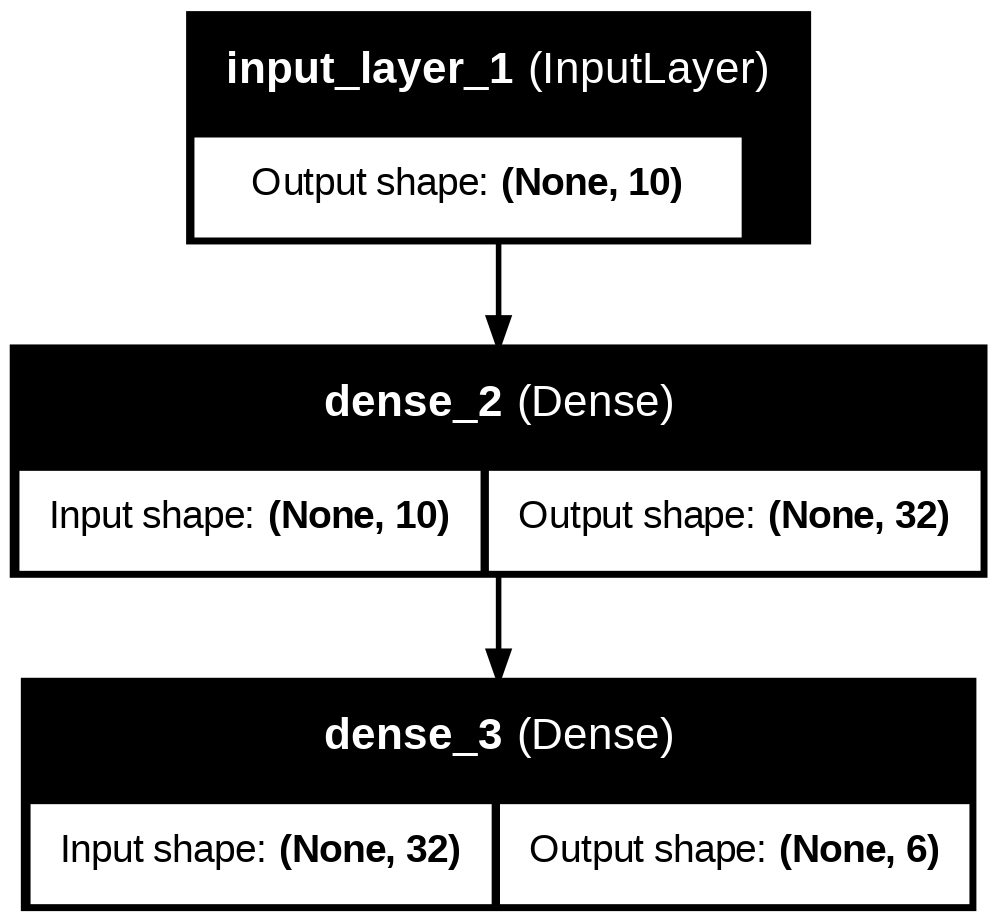

In [ ]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(classifier, show_shapes=True, show_layer_names=True)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


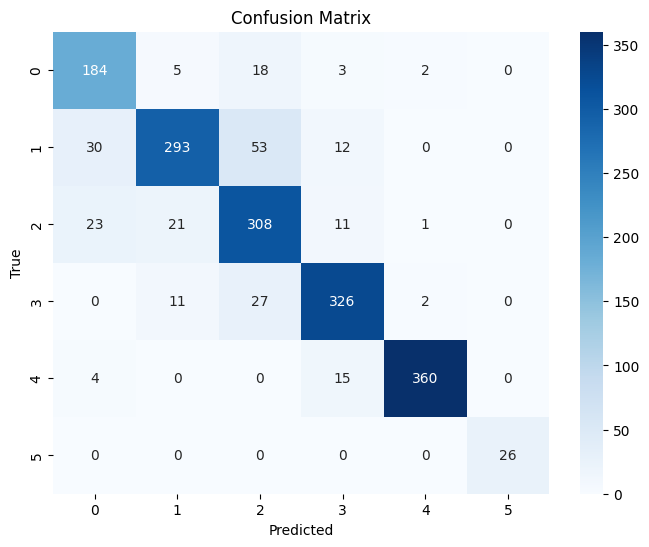

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = classifier.predict(X_test_encoded).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


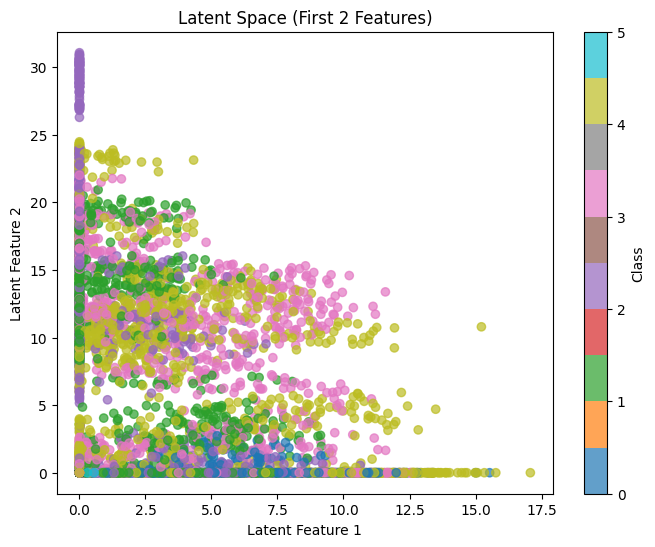

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_encoded[:,0], X_train_encoded[:,1], c=y_train, cmap='tab10', alpha=0.7)
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.title("Latent Space (First 2 Features)")
plt.colorbar(label="Class")
plt.show()


**Workflow Overview**

1. Preprocessing
* Normalize spectral features (values ~0.06–1.16).

* Split into train/test sets.

* Encode target (Concentration_Class or purity labels).


2. Autoencoder Training

* Build an autoencoder to compress spectral features into a lower‑dimensional latent space.

* Encoder learns meaningful representations of spectra.

* Decoder reconstructs input spectra (unsupervised training).

3. Feature Extraction

* Use the encoder part to transform spectra into latent features.

* These latent features capture purity‑related patterns.

4. Classification

* Train a classifier (e.g., logistic regression, random forest, or a small dense neural net) on the latent features to predict honey purity classes.

5. Interpretability with SHAP

* Apply SHAP to the classifier to understand which latent features (and ultimately which wavelengths) contribute most to purity classification.

* Map SHAP values back to original spectral features for domain insights.